## Set up code


In [1]:
# import the data
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

dataDir = os.path.join(os.getcwd(), "learning", "data")
print(dataDir)
sys.path.append(dataDir)

/root/TIPDM_CUP/learning/data


## Basic grammar & params

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


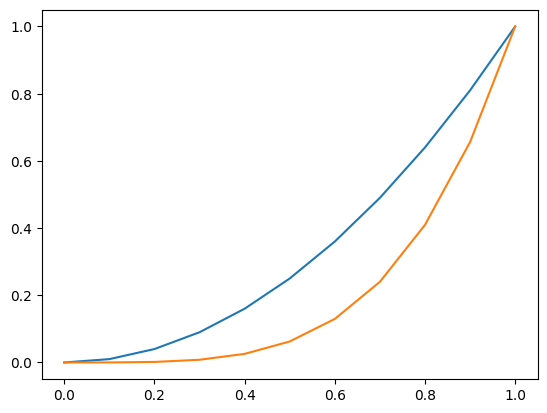

In [5]:
x = np.arange(0, 1.1, 0.1)
print(x)
plt.figure()                       # stage 1. create blank canvas
plt.plot(x, x**2)                  # stage 2. draw shapes
plt.plot(x, x**4) # another curves
plt.show() # showing the shape     # stage 3. show picture

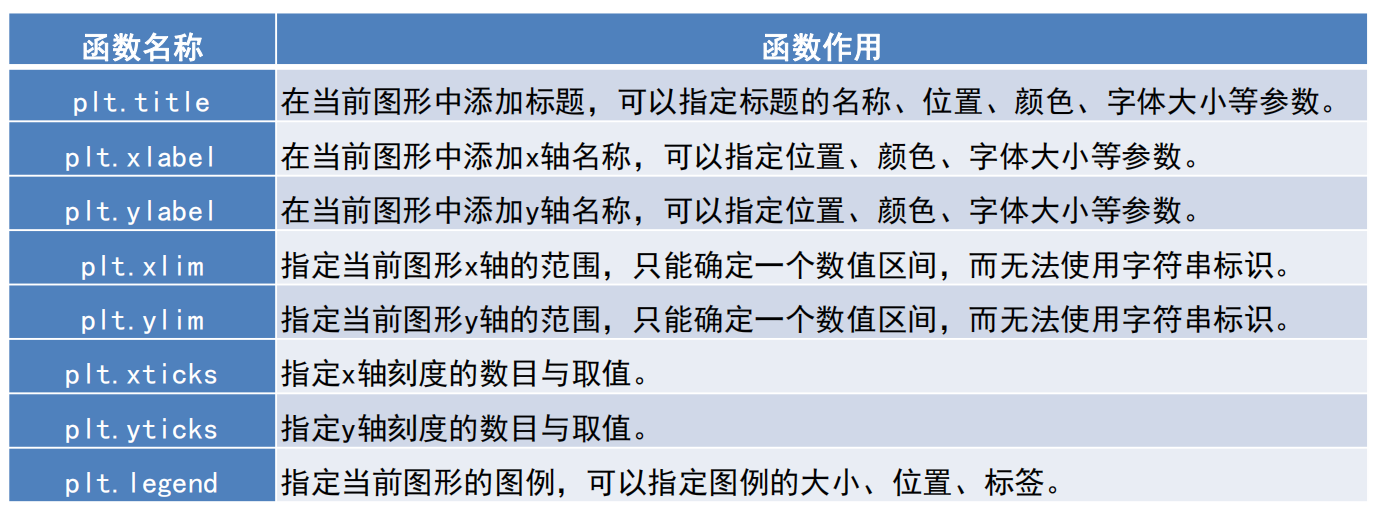

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


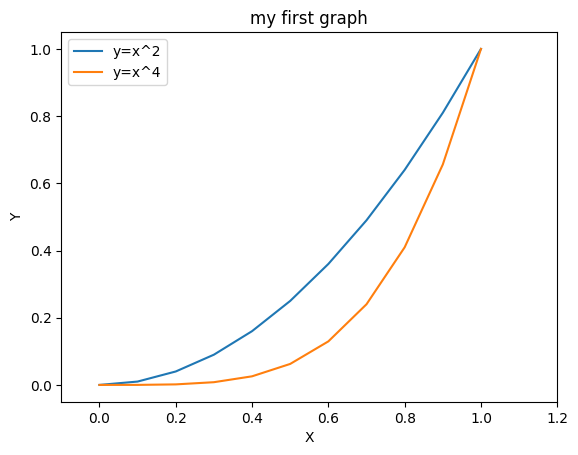

In [11]:
x = np.arange(0, 1.1, 0.1)
print(x)
plt.figure()                       # stage 1. create blank canvas
plt.title('my first graph')
plt.plot(x, x**2)                  # stage 2. draw shapes
plt.xlabel('X')
plt.xlim([-0.1,1.2])
plt.ylabel('Y')
plt.plot(x, x**4) # another curves

plt.legend(['y=x^2', "y=x^4"])
plt.savefig('tmp/example_1.png')
plt.show() # showing the shape     # stage 3. show picture

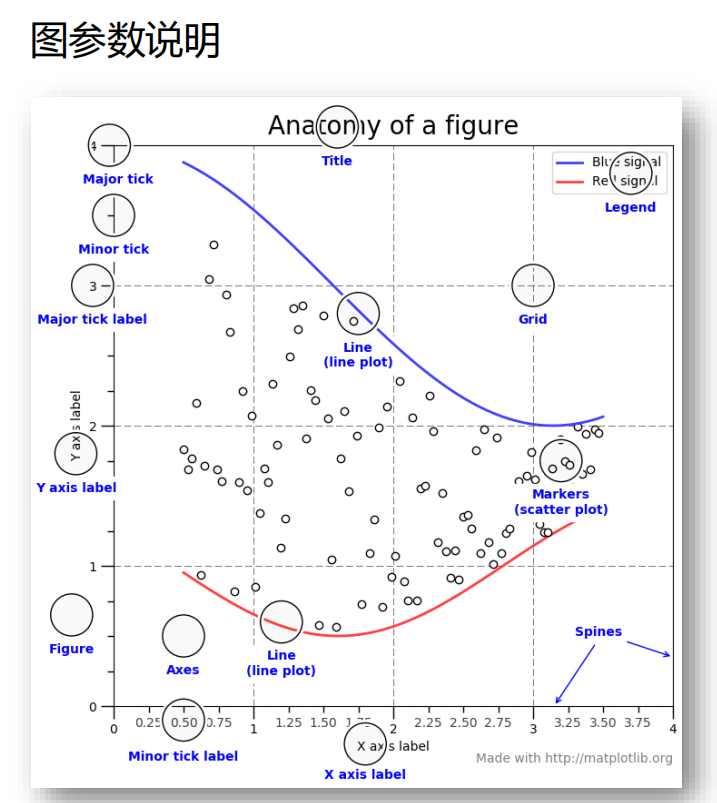

## analize the relationships of features

### scatter diagram

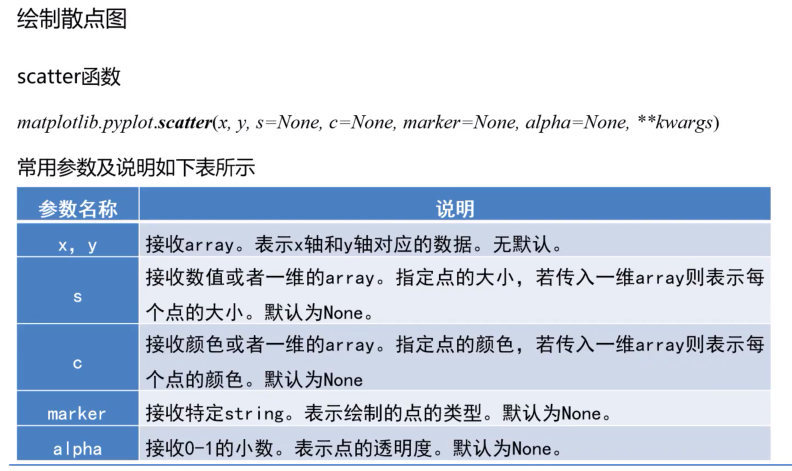

In [4]:
data = np.load('learning/data/economy.npz', allow_pickle=True) 
columns = data['columns']
print(columns)
values = data['values']
print(values)
print(values.shape)

['序号' '时间' '国内生产总值_当季值(亿元)' '第一产业增加值_当季值(亿元)' '第二产业增加值_当季值(亿元)'
 '第三产业增加值_当季值(亿元)' '农林牧渔业增加值_当季值(亿元)' '工业增加值_当季值(亿元)' '建筑业增加值_当季值(亿元)'
 '批发和零售业增加值_当季值(亿元)' '交通运输、仓储和邮政业增加值_当季值(亿元)' '住宿和餐饮业增加值_当季值(亿元)'
 '金融业增加值_当季值(亿元)' '房地产业增加值_当季值(亿元)' '其他行业增加值_当季值(亿元)']
[[1 '2000年第一季度' 21329.9 ... 1235.9 933.7 3586.1]
 [2 '2000年第二季度' 24043.4 ... 1124.0 904.7 3464.9]
 [3 '2000年第三季度' 25712.5 ... 1170.4 1070.9 3518.2]
 ...
 [67 '2016年第三季度' 190529.5 ... 15472.5 12164.1 37964.1]
 [68 '2016年第四季度' 211281.3 ... 15548.7 13214.9 39848.4]
 [69 '2017年第一季度' 180682.7 ... 17213.5 12393.4 42443.1]]
(69, 15)


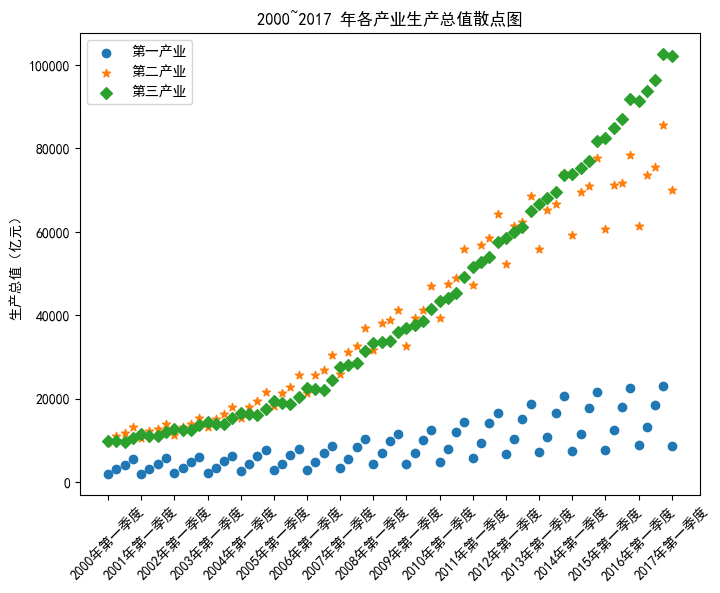

In [23]:
# drawing scatter
plt.figure(figsize=(8, 6))
plt.rcParams['font.sans-serif'] = 'SimHei' # 设置中文显示
plt.rcParams['axes.unicode_minus'] = False

plt.scatter(values[:, 1], values[:, 3], marker='o')   # default will create canvas
plt.scatter(values[:, 1], values[:, 4], marker='*')   # marker can change the dot's shape
plt.scatter(values[:, 1], values[:, 5], marker='D')

plt.xticks(range(0, 70, 4), values[range(0, 70, 4), 1], rotation=45)
# help(plt.xticks)

plt.legend(["第一产业", "第二产业", "第三产业"])
plt.ylabel("生产总值（亿元）")
plt.title("2000~2017 年各产业生产总值散点图")
plt.savefig("tmp/product.png")
plt.show()

### line chart

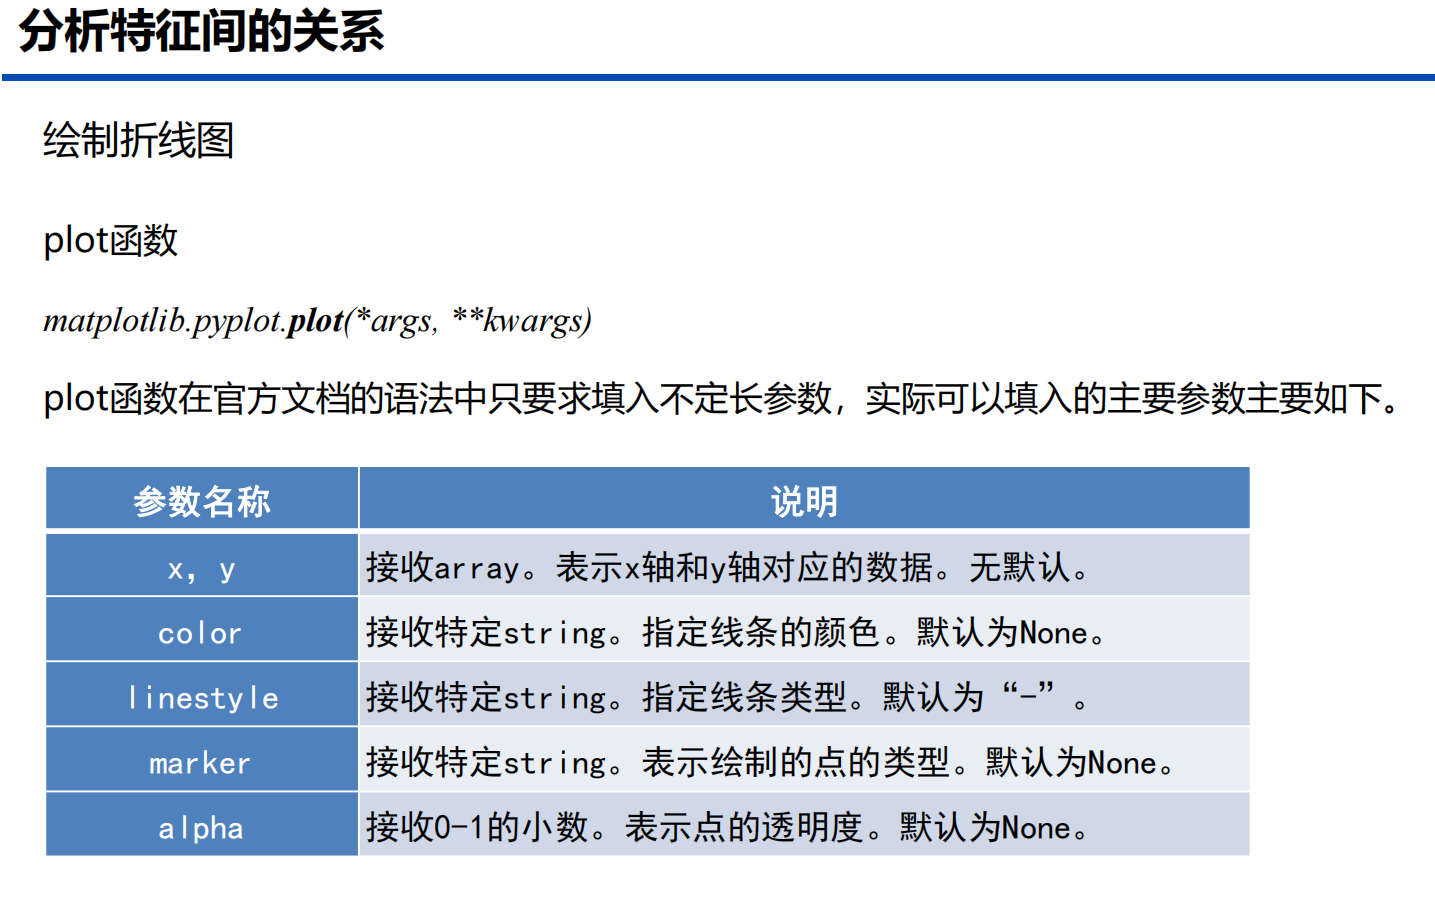

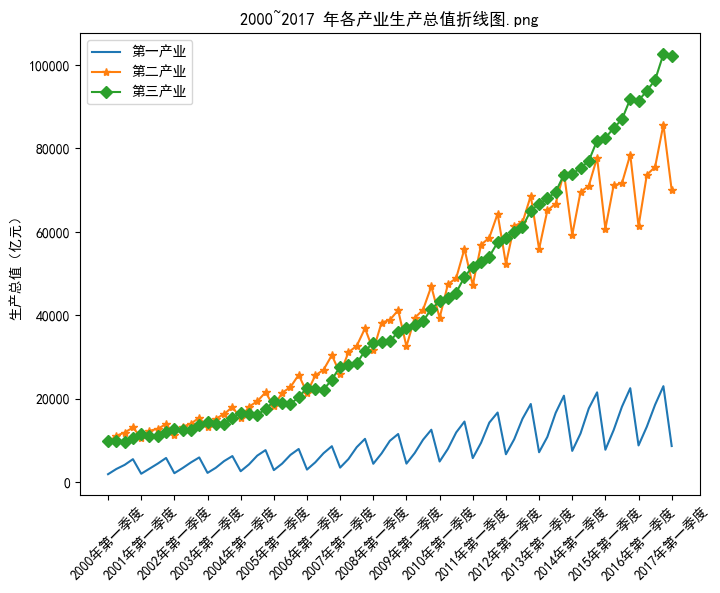

In [12]:
# drawing line chart
plt.figure(figsize=(8, 6))
plt.rcParams['font.sans-serif'] = 'SimHei' # 设置中文显示
plt.rcParams['axes.unicode_minus'] = False

# plt.plot(values[:, 1], values[:, 3], marker='o')   # default will create canvas
# plt.plot(values[:, 1], values[:, 3], linestyle='-') # solid line
plt.plot(values[:, 1], values[:, 3], linestyle="solid") # dotted line
plt.plot(values[:, 1], values[:, 4], marker='*')
plt.plot(values[:, 1], values[:, 5], marker='D')

plt.xticks(range(0, 70, 4), values[range(0, 70, 4), 1], rotation=45)
# help(plt.xticks)

plt.legend(["第一产业", "第二产业", "第三产业"])
plt.ylabel("生产总值（亿元）")
plt.title("2000~2017 年各产业生产总值折线图.png")
plt.savefig("tmp/product.png")
plt.show()

### histogram

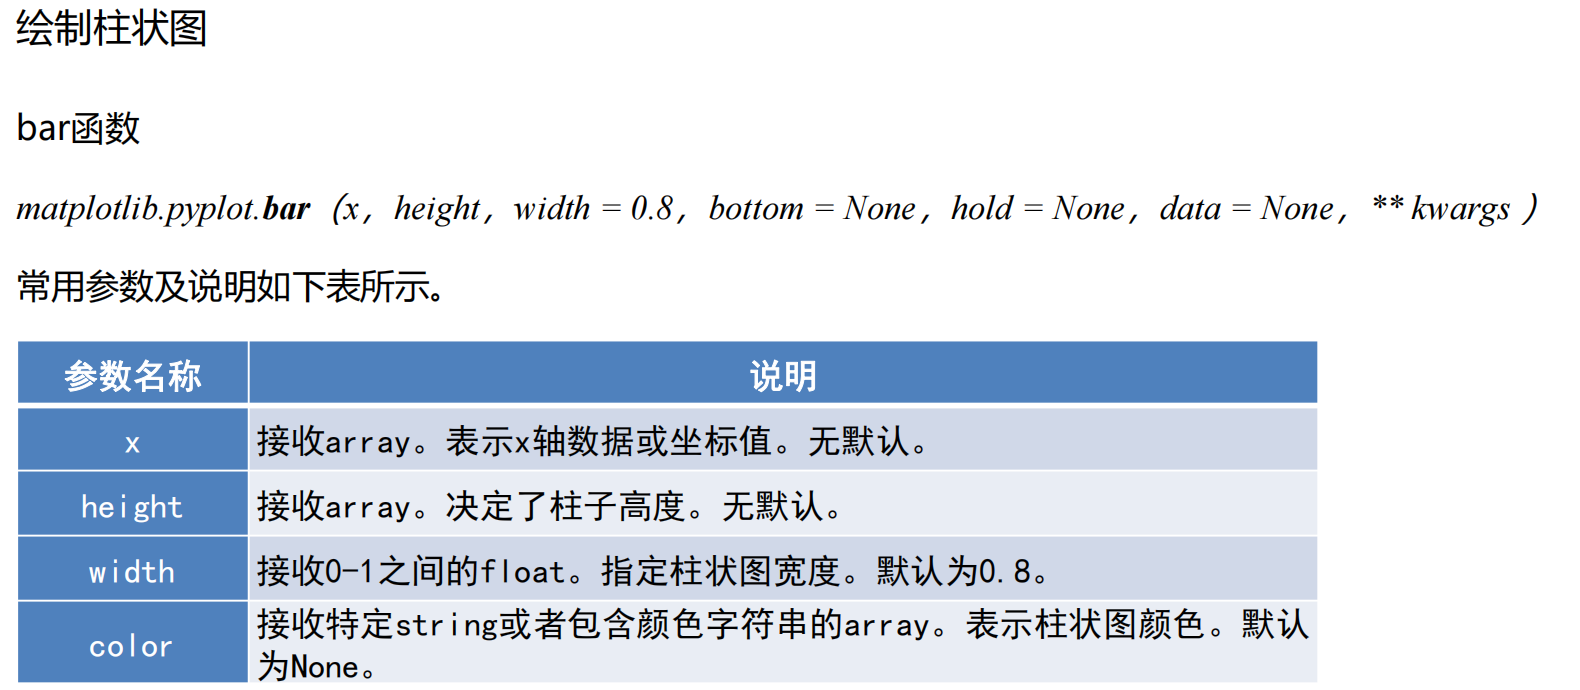

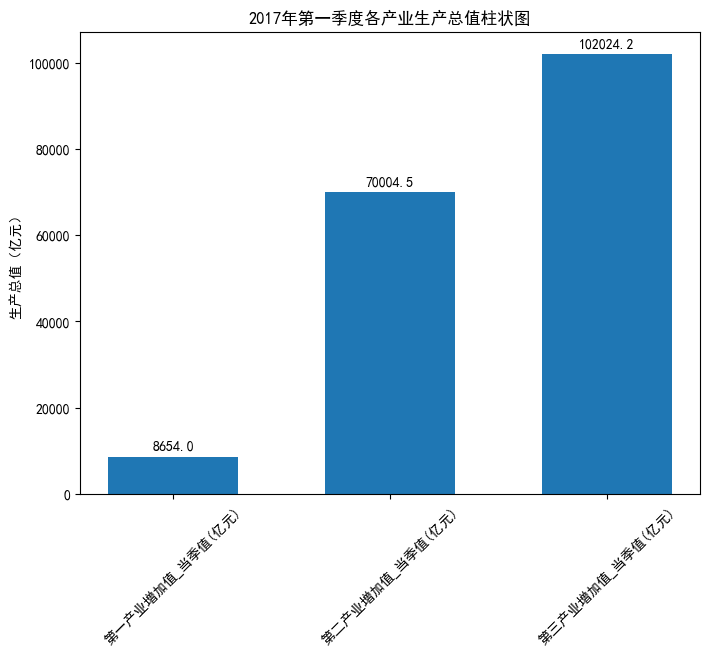

In [23]:
# drawing histogram
plt.figure(figsize=(8, 6))
plt.rcParams['font.sans-serif'] = 'SimHei' # 设置中文显示
plt.rcParams['axes.unicode_minus'] = False

plt.bar(columns[3:6], values[-1, 3:6], width=0.6)
plt.xticks(range(0, 3), columns[3:6], rotation=45)

plt.title('2017年第一季度各产业生产总值柱状图')
plt.ylabel('生产总值（亿元）')
# adding tag on the bars
my_height = values[-1, 3:6]
for i in range(len(my_height)):
    # first arg: i is the x value of the text
    # second arg: my_height[i] is the y value of the text
    # third arg: my_height[i] is the text
    plt.text(i, my_height[i] + 1000, my_height[i], va='bottom', ha='center')

plt.show()

### pie graph

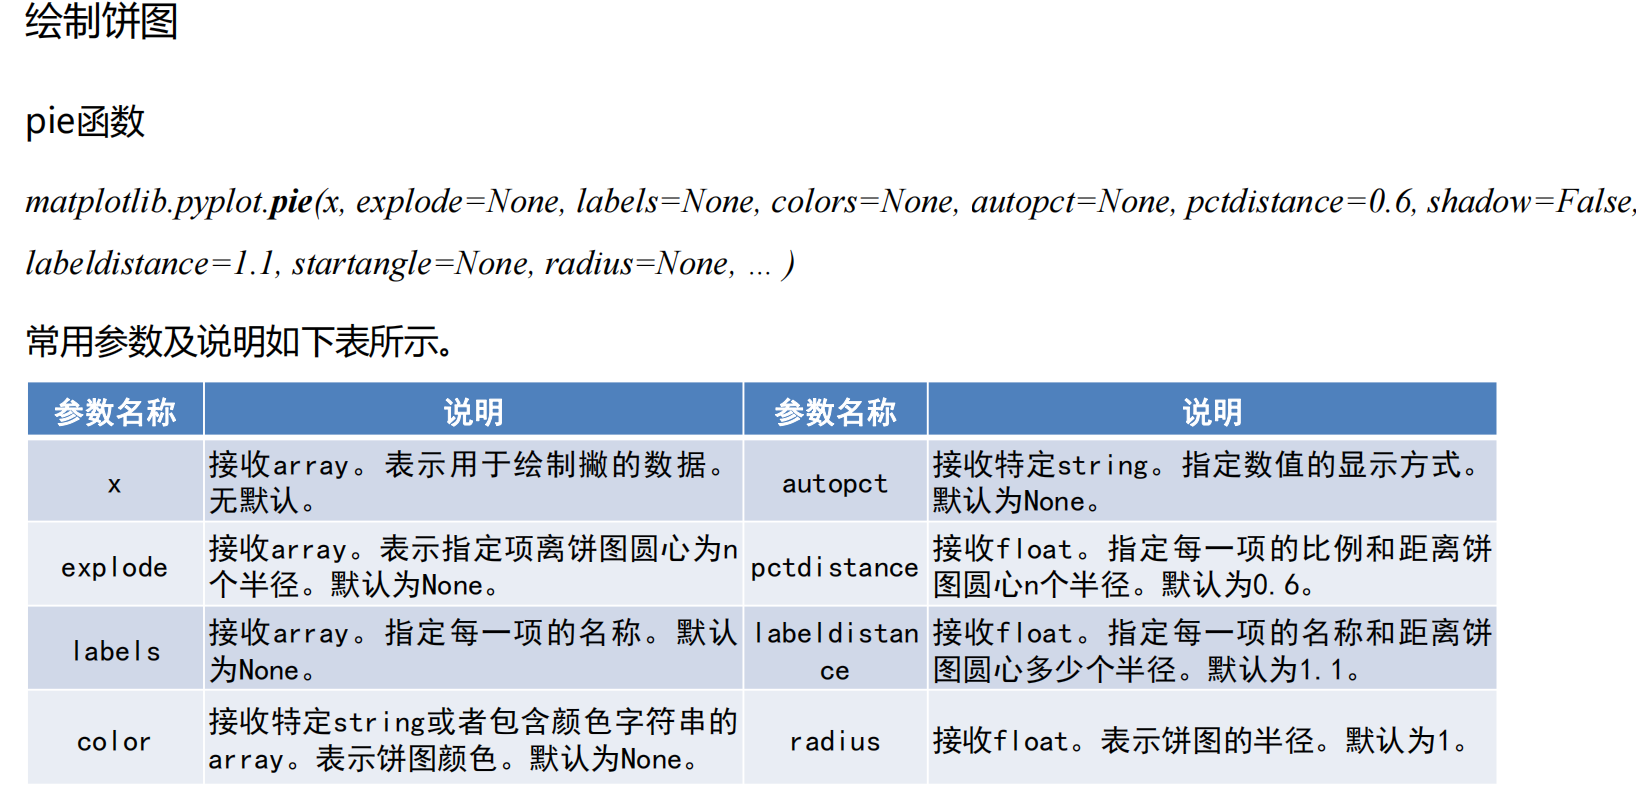

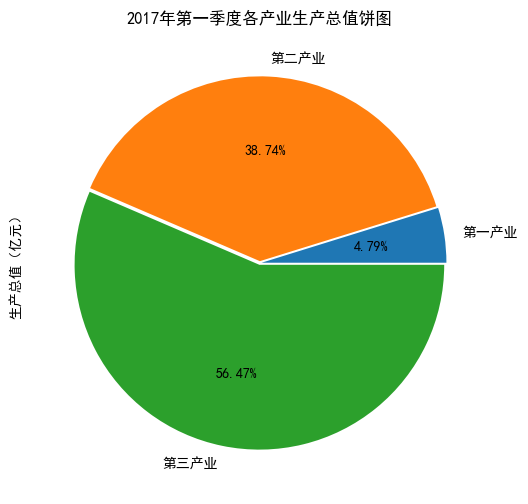

In [34]:
# drawing pie graph
plt.figure(figsize=(6, 6))
plt.rcParams['font.sans-serif'] = 'SimHei' # 设置中文显示
plt.rcParams['axes.unicode_minus'] = False

labels = ['第一产业', '第二产业', '第三产业']

plt.pie(values[-1, 3:6], explode=[0.01, 0.01, 0.01], labels=labels, autopct='%1.2f%%') # explode between (0,1)
plt.title('2017年第一季度各产业生产总值饼图')
plt.ylabel('生产总值（亿元）')

plt.show()

### boxplot

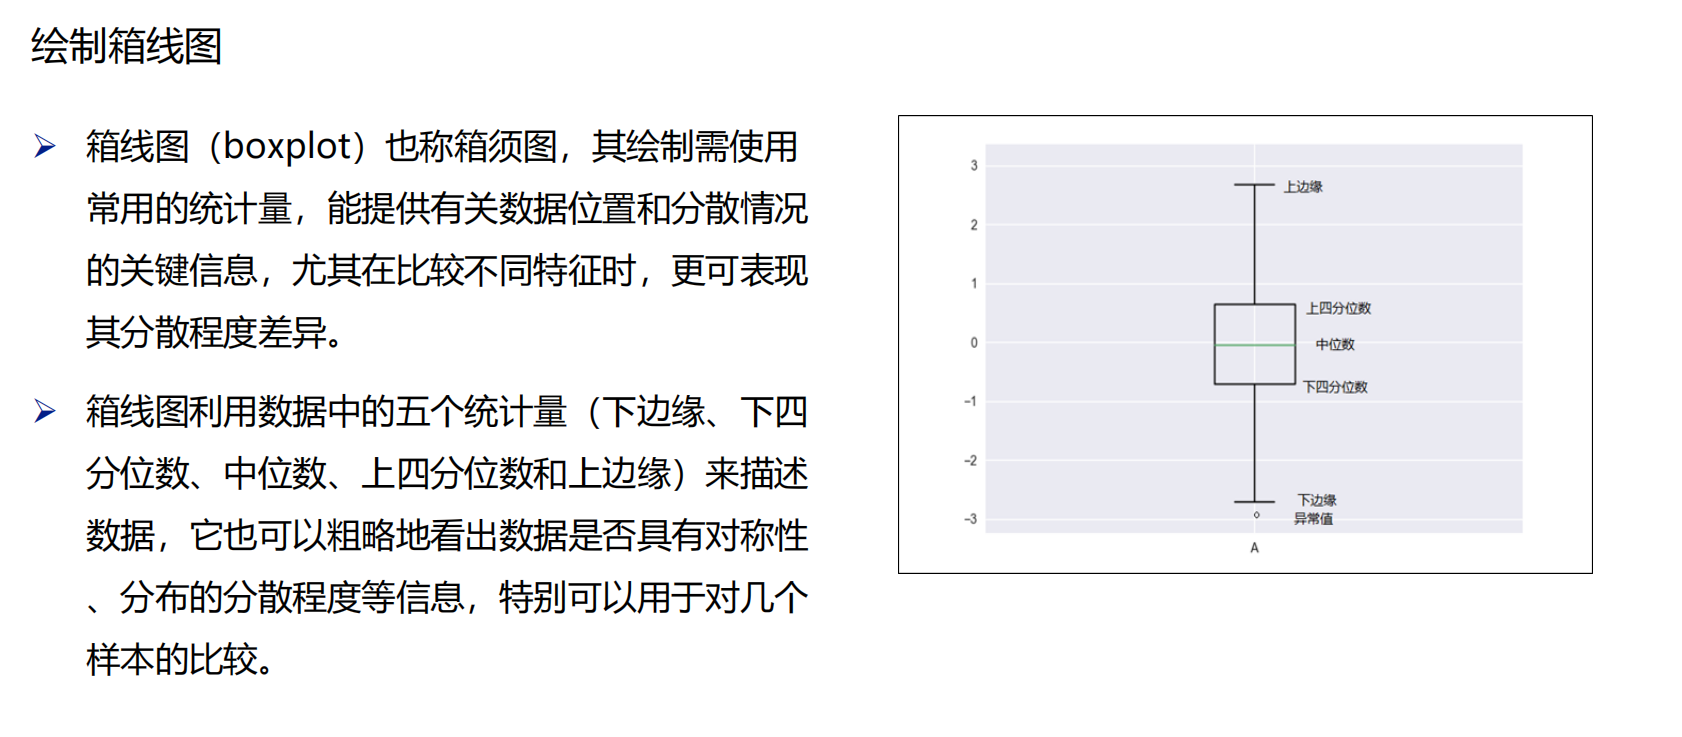

* 上四分位数表示第 75% 的数据所在位置
* 下四分位数表示第 25% 的数据所在位置
* 四分位距：上四分位数减去下四分位数（IQR）
* 上边缘，**并非最高数据点**，而是上四分位数加上 1.5 倍的四分位距,超过上边缘的值为异常值
* 下边缘，**并非最低数据点**，而是下四分位数减去 1.5 倍的四分位距，低于下边缘的值为异常值

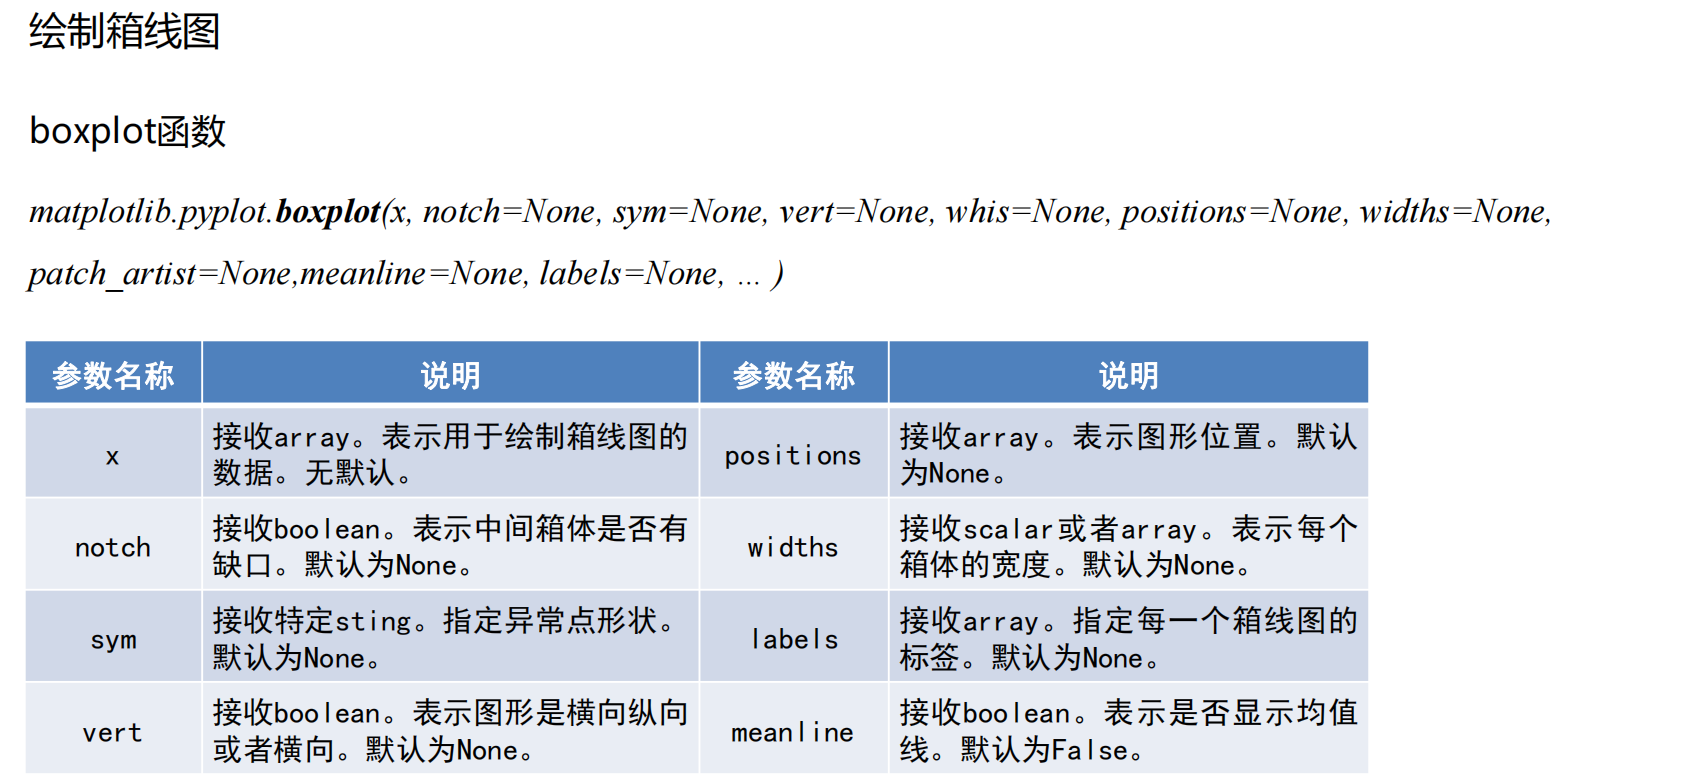

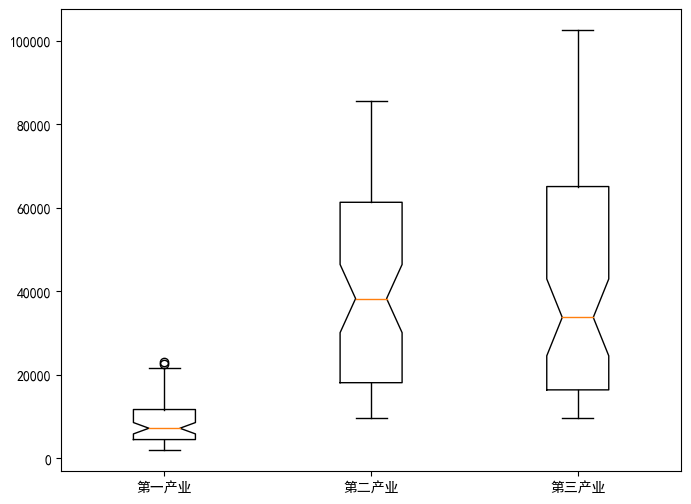

In [39]:
# drawing boxplot
plt.figure(figsize=(8, 6))
plt.rcParams['font.sans-serif'] = 'SimHei' # 设置中文显示
plt.rcParams['axes.unicode_minus'] = False

labels = ['第一产业', '第二产业', '第三产业']

plt.boxplot(values[:, 3:6], notch=True, labels=labels)

plt.show()
# values[:, 3] # the product of the first industry

## 世界地图绘制 BaseMap

In [1]:
import pandas as pd
cities = pd.read_csv('Data/worldcitiespop.csv')

/tmp/ipykernel_11359/877661815.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  cities = pd.read_csv('Data/worldcitiespop.csv')


In [2]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3173958 entries, 0 to 3173957
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Country     object 
 1   City        object 
 2   AccentCity  object 
 3   Region      object 
 4   Population  float64
 5   Latitude    float64
 6   Longitude   float64
dtypes: float64(3), object(4)
memory usage: 169.5+ MB


In [4]:
China = cities[cities['Country'] == 'cn']
China

,Country,City,AccentCity,Region,Population,Latitude,Longitude
419255,cn,103 chang qingniandian,103 Chang Qingniandian,8,NaN,44.907285,127.824479
419256,cn,aa¿arsin,AÂ¿arsin,13,NaN,43.487222,82.407222
419257,cn,aa¿ax oba,AÂ¿ax Oba,13,NaN,46.300000,90.400000
419258,cn,aba,Aba,14,NaN,29.000000,97.900000
419259,cn,aba,Aba,32,NaN,32.902191,101.706655
...,...,...,...,...,...,...,...
658235,cn,zuye,Zuye,15,NaN,34.050548,103.769233
658236,cn,zuyuan,Zuyuan,1,NaN,29.660349,118.033083
658237,cn,zuzheng,Zuzheng,31,NaN,18.603881,109.819718
658238,cn,zuzhuang,Zuzhuang,4,NaN,33.863888,119.779995


In [7]:
harbin = China[China['City'] == 'harbin']
harbin

,Country,City,AccentCity,Region,Population,Latitude,Longitude
480266,cn,harbin,Harbin,8,3229883.0,45.75,126.65


In [8]:
cd = China[China['City'] == 'chengdu']

In [9]:
cd

,Country,City,AccentCity,Region,Population,Latitude,Longitude
437594,cn,chengdu,Chengdu,3,NaN,26.368281,115.342894
437595,cn,chengdu,Chengdu,32,3950437.0,30.666667,104.066667


In [10]:
shenzhen = China[China['City'] == 'shenzhen']
shenzhen

,Country,City,AccentCity,Region,Population,Latitude,Longitude
577261,cn,shenzhen,Shenzhen,2,NaN,29.415912,121.339707
577262,cn,shenzhen,Shenzhen,23,NaN,31.717778,121.293703
577263,cn,shenzhen,Shenzhen,30,1002592.0,22.533333,114.133333


In [11]:
guangzhou = China[China['City'] == 'guangzhou']
guangzhou

,Country,City,AccentCity,Region,Population,Latitude,Longitude
474854,cn,guangzhou,Guangzhou,3,NaN,27.381639,114.134262
474855,cn,guangzhou,Guangzhou,30,3152825.0,23.116667,113.250000


In [ ]:
# 非洲国家及其首都简称和首都名称
african_countries_and_capitals = [
    ("DZ", "Algiers"),               # Algeria
    ("AO", "Luanda"),                # Angola
    ("BJ", "Porto-Novo"),            # Benin
    ("BW", "Gaborone"),              # Botswana
    ("BF", "Ouagadougou"),           # Burkina Faso
    ("BI", "Gitega"),                # Burundi
    ("CV", "Praia"),                 # Cabo Verde
    ("CM", "Yaoundé"),               # Cameroon
    ("CF", "Bangui"),                # Central African Republic
    ("TD", "N'Djamena"),             # Chad
    ("KM", "Moroni"),                # Comoros
    ("CG", "Brazzaville"),           # Congo, Republic of the
    ("CD", "Kinshasa"),              # Congo, Democratic Republic of the
    ("DJ", "Djibouti"),              # Djibouti
    ("EG", "Cairo"),                 # Egypt
    ("GQ", "Malabo"),                # Equatorial Guinea
    ("ER", "Asmara"),                # Eritrea
    ("SZ", "Mbabane"),               # Eswatini
    ("ET", "Addis Ababa"),           # Ethiopia
    ("GA", "Libreville"),            # Gabon
    ("GM", "Banjul"),                # Gambia
    ("GH", "Accra"),                 # Ghana
    ("GN", "Conakry"),               # Guinea
    ("GW", "Bissau"),                # Guinea-Bissau
    ("CI", "Yamoussoukro"),          # Ivory Coast
    ("KE", "Nairobi"),               # Kenya
    ("LS", "Maseru"),                # Lesotho
    ("LR", "Monrovia"),              # Liberia
    ("LY", "Tripoli"),               # Libya
    ("MG", "Antananarivo"),          # Madagascar
    ("MW", "Lilongwe"),              # Malawi
    ("ML", "Bamako"),                # Mali
    ("MR", "Nouakchott"),            # Mauritania
    ("MU", "Port Louis"),            # Mauritius
    ("MA", "Rabat"),                 # Morocco
    ("MZ", "Maputo"),                # Mozambique
    ("NA", "Windhoek"),              # Namibia
    ("NE", "Niamey"),                # Niger
    ("NG", "Abuja"),                 # Nigeria
    ("RW", "Kigali"),                # Rwanda
    ("ST", "São Tomé"),              # Sao Tome and Principe
    ("SN", "Dakar"),                 # Senegal
    ("SC", "Victoria"),              # Seychelles
    ("SL", "Freetown"),              # Sierra Leone
    ("SO", "Mogadishu"),             # Somalia
    ("ZA", "Pretoria"),              # South Africa
    ("SS", "Juba"),                  # South Sudan
    ("SD", "Khartoum"),              # Sudan
    ("TZ", "Dodoma"),                # Tanzania
    ("TG", "Lomé"),                  # Togo
    ("TN", "Tunis"),                 # Tunisia
    ("UG", "Kampala"),               # Uganda
    ("ZM", "Lusaka"),                # Zambia
    ("ZW", "Harare")                 # Zimbabwe
]
lat_lons = []
for it in african_countries_and_capitals:
    country, capital = it
    country = country.lower()
    lat_lon = 

# User Guides

<Figure size 640x480 with 0 Axes>

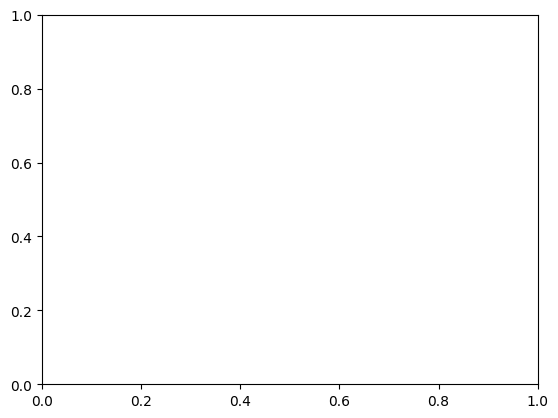

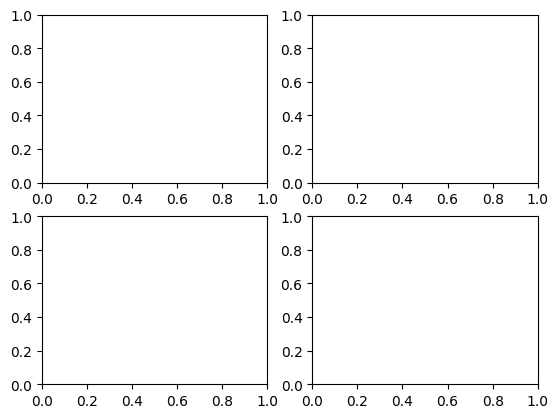

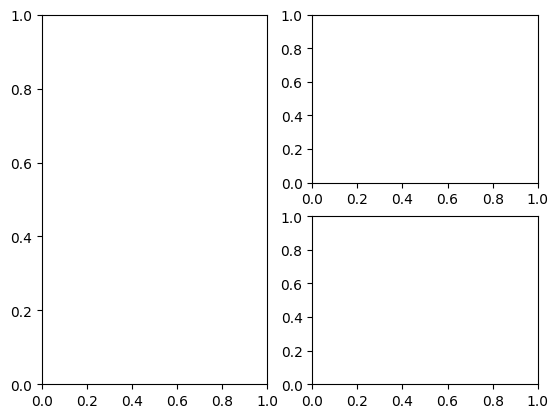

In [3]:
fig = plt.figure()             # an empty figure with no Axes
fig, ax = plt.subplots()       # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
# a figure with one Axes on the left, and two on the right:
fig, axs = plt.subplot_mosaic([['left', 'right_top'],
                               ['left', 'right_bottom']])

Text(0, 0.5, 'entry b')

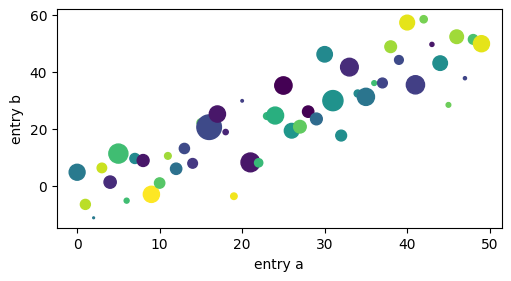

In [4]:
np.random.seed(19680801)  # seed the random number generator.
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b')